## [통계적머신러닝] 과제10
통계학과 2019150419 기다연<br>
2021.11.02

### 문제1.
house 데이터에 적용한 linear regression, SVM(선형), 그리고 RANSAC에 의해 추정된 선형모형을 제시하고, RANSAC(그러므로 outlier이 제거된 OLS 선형모형)과의 비교를 통해 linear regression 모형과 SVM을 설명하라.

In [1]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [68]:
len(X_train)

354

In [3]:
# 일부 변수에 대한 log 변환
import numpy as np
house['LLSTAT']=np.log(house['LSTAT'])
house['LINDUS']=np.log(house['INDUS'])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LLSTAT,LINDUS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.605430,0.837248
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.212660,1.955860
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.393766,1.955860
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.078410,0.779325
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.673351,0.779325


In [4]:
# 전체 data를 종속변수 y와 특성변수 X의 data로 나누기
y = house['MEDV'].values
house1 = house.drop(['LSTAT','INDUS','MEDV'], axis=1)
X = house1.values

In [5]:
# 전체 data를 traning data(70%)와 test data(30%)로 나누기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Linear Regression (선형 회귀)

In [8]:
# regression module 불러오기/모형 추정
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [9]:
# 추정값 확인
# underline(_)은 추정치라는 의미
print('Slope:' , mlr.coef_)
print('Intercept:' , mlr.intercept_)

Slope: [-1.36676828e-01  3.13177997e-02  2.52393199e+00 -1.70295629e+01
  1.23977704e+00  3.06818458e-02 -1.28840466e+00  2.61968148e-01
 -6.58141653e-03 -8.27862485e-01  4.90558897e-03 -9.97211822e+00
 -6.04522425e-01]
Intercept: 65.69779117501709


In [10]:
# 예측치 구하기
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

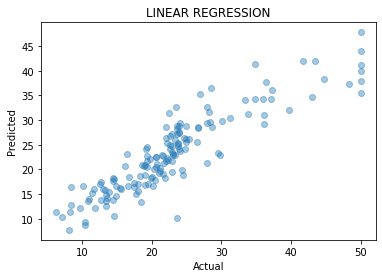

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION")
plt.show()

In [20]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 18.139, test: 17.416


In [21]:
# 모형의 R^2
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.777, test: 0.810


LINEAR REGRESSION
Slope: [-1.36676828e-01  3.13177997e-02  2.52393199e+00 -1.70295629e+01
  1.23977704e+00  3.06818458e-02 -1.28840466e+00  2.61968148e-01
 -6.58141653e-03 -8.27862485e-01  4.90558897e-03 -9.97211822e+00
 -6.04522425e-01]
Intercept: 65.69779117501709


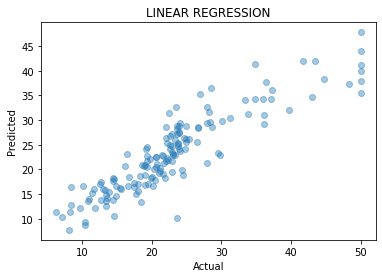

MSE train: 18.139, MSE test: 17.416
R^2 train: 0.777, R^2 test: 0.810


In [23]:
# Linear Regression
print('LINEAR REGRESSION')
print('Slope:' , mlr.coef_)
print('Intercept:' , mlr.intercept_)

plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR REGRESSION")
plt.show()

print('MSE train: %.3f, MSE test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, R^2 test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

### SVM (선형)

In [27]:
from sklearn.svm import SVR

svl=SVR(kernel='linear', C=1.0,epsilon=0.1)      # 선형 SVM회귀
svl.fit(X_train,y_train)   # 선형 SVM model fitting

SVR(kernel='linear')

In [28]:
print('Slope:', svl.coef_)
print('Intercept:', svl.intercept_)

Slope: [[-0.10458789  0.02278352  1.66254749 -2.28961732  3.54885846 -0.0121021
  -0.76001148  0.17584393 -0.01029868 -0.64102215  0.01212433 -5.77970899
  -0.6072531 ]]
Intercept: [29.58999764]


In [29]:
y_train_predsvl=svl.predict(X_train)   # 선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl.predict(X_test)   # 선형 SVM test set의 예측치 구하기

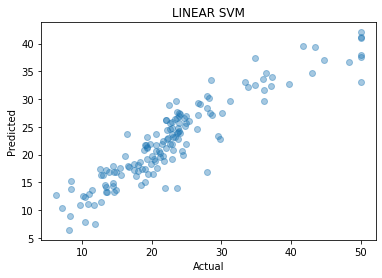

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predsvl, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR SVM")
plt.show()

In [31]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print('MSE train(linear): %.3f, test(linear): %.3f' % (mse_l_train, mse_l_test))

MSE train(linear): 22.270, test(linear): 16.382


In [32]:
# 모형의 R^2
from sklearn.metrics import r2_score

R2_l=r2_score(y_train, y_train_predsvl)
print('R^2 train(linear): %.3f' % (R2_l))

R^2 train(linear): 0.726


Linear SVM
Slope: [[-0.10458789  0.02278352  1.66254749 -2.28961732  3.54885846 -0.0121021
  -0.76001148  0.17584393 -0.01029868 -0.64102215  0.01212433 -5.77970899
  -0.6072531 ]]
Intercept: [29.58999764]


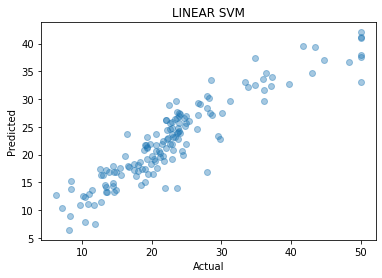

MSE train(linear): 22.270, test(linear): 16.382
R^2 train(linear): 0.726


In [34]:
# Linear SVM
print('Linear SVM')
print('Slope:', svl.coef_)
print('Intercept:', svl.intercept_)

plt.scatter(y_test, y_test_predsvl, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LINEAR SVM")
plt.show()

print('MSE train(linear): %.3f, test(linear): %.3f' % (mse_l_train, mse_l_test))
print('R^2 train(linear): %.3f' % (R2_l))

### RANSAC

In [35]:
from sklearn.linear_model import RANSACRegressor

rans = RANSACRegressor(max_trials=100,min_samples=45,loss='absolute_loss',residual_threshold=5.0, random_state=1)
rans.fit(X_train,y_train)
y_train_pred=rans.predict(X_train)
y_test_pred=rans.predict(X_test)

In [36]:
print('Slope:', rans.estimator_.coef_)
print('Intercept:', rans.estimator_.intercept_)

Slope: [-0.33997467  0.02628575  1.26584351 -6.7774809   3.20459419 -0.03651634
 -1.13372086  0.24298439 -0.00712198 -0.59996172  0.01186441 -3.85624577
 -1.01175348]
Intercept: 31.427983601251675


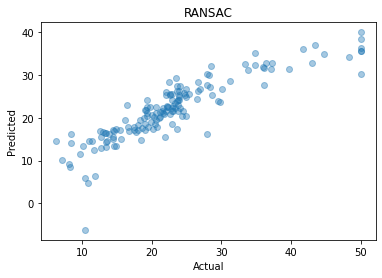

In [40]:
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RANSAC")
plt.show()

In [37]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, MSE test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 26.959, MSE test: 22.296


In [41]:
# 모형의 R^2
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.668, test: 0.757


In [39]:
# Outlier 체크
inlier_mask = rans.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print('outlier', outlier_mask)

outlier [False False  True False  True False False False  True  True False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False  True
 False False False False False False  True False  True False  True  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False  True  True False False False False  True False False False False
 False False False False False False False False False  True False False
 False False  True False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False  True False False False False  True False
 False False False False False False False 

In [43]:
# Oulier 개수 세기
unique, counts = np.unique(outlier_mask, return_counts=True)
uniq_cnt_dict = dict(zip(unique, counts))
print('Outlier Count(False=inlier, True=outlier)')
uniq_cnt_dict

Outlier Count(False=inlier, True=outlier)


{False: 299, True: 55}

RANSAC
Slope: [-0.33997467  0.02628575  1.26584351 -6.7774809   3.20459419 -0.03651634
 -1.13372086  0.24298439 -0.00712198 -0.59996172  0.01186441 -3.85624577
 -1.01175348]
Intercept: 31.427983601251675


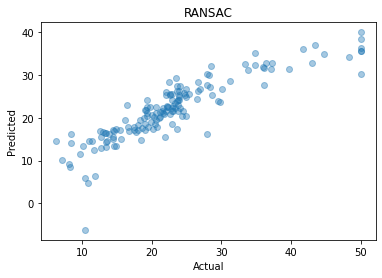

MSE train: 26.959, MSE test: 22.296
Outlier Count(False=inlier, True=outlier) {False: 299, True: 55}


In [45]:
print('RANSAC')
print('Slope:', rans.estimator_.coef_)
print('Intercept:', rans.estimator_.intercept_)

plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RANSAC")
plt.show()

print('MSE train: %.3f, MSE test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('Outlier Count(False=inlier, True=outlier)', uniq_cnt_dict)

### 문제2.
house 데이터에 적용된 SVM에서 epsilon의 역할을 support vector의 관점에서 논의하라.

LINEAR SVM(EPSILON=0.1)
MSE train(epsilon=0.1): 22.270, test(epsilon=0.1): 16.382
R^2 train(epsilon=0.1): 0.726

LINEAR SVM(EPSILON=0.3)
MSE train(epsilon=0.3): 22.356, test(epsilon=0.3): 16.711
R^2 train(epsilon=0.3): 0.725

LINEAR SVM(EPSILON=0.5)
MSE train(epsilon=0.5): 22.290, test(epsilon=0.5): 16.888
R^2 train(epsilon=0.5): 0.725

LINEAR SVM(EPSILON=0.7)
MSE train(epsilon=0.7): 22.068, test(epsilon=0.7): 16.889
R^2 train(epsilon=0.7): 0.728

LINEAR SVM(EPSILON=0.9)
MSE train(epsilon=0.9): 22.187, test(epsilon=0.9): 16.696
R^2 train(epsilon=0.9): 0.727

LINEAR SVM(EPSILON=1.0)
MSE train(epsilon=1.0): 22.005, test(epsilon=1.0): 16.966
R^2 train(epsilon=1.0): 0.729

LINEAR SVM(EPSILON=2.0)
MSE train(epsilon=2.0): 21.443, test(epsilon=2.0): 17.217
R^2 train(epsilon=2.0): 0.736

LINEAR SVM(EPSILON=3.0)
MSE train(epsilon=3.0): 20.357, test(epsilon=3.0): 16.713
R^2 train(epsilon=3.0): 0.749

LINEAR SVM(EPSILON=4.0)
MSE train(epsilon=4.0): 20.199, test(epsilon=4.0): 17.850
R^2 train(epsi

[]

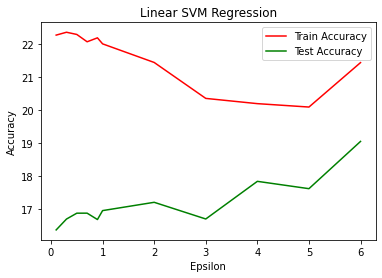

In [70]:
# 선형 SVM에서의 epsilon의 역할
from sklearn.svm import SVR
eps_lst = [.1,.3,.5,.7,.9,1,2,3,4,5,6]
train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for i in eps_lst:
    print('LINEAR SVM(EPSILON=%.1f)' % i)
    svl=SVR(kernel='linear', C=1.0, epsilon=i)
    svl.fit(X_train, y_train)
    y_train_predsvl=svl.predict(X_train) 
    y_test_predsvl=svl.predict(X_test) 
    
    mse_l_train=mean_squared_error(y_train, y_train_predsvl)
    mse_l_test=mean_squared_error(y_test, y_test_predsvl)
    print('MSE train(epsilon=%.1f): %.3f, test(epsilon=%.1f): %.3f' % (i, mse_l_train, i, mse_l_test))
    train_errors.append(mse_l_train)
    test_errors.append(mse_l_test)
    
    R2_l=r2_score(y_train, y_train_predsvl)
    print('R^2 train(epsilon=%.1f): %.3f' % (i, R2_l))
    print()
    
x = np.arange(len(eps_lst)) + 1 # Create domain for plot
plt.plot(eps_lst, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(eps_lst, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('Epsilon') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Linear SVM Regression')
plt.plot() # Show graph

NON-LINEAR SVM(EPSILON=0.1)
MSE train(epsilon=0.1): 66.444, test(epsilon=0.1): 75.256
R^2 train(epsilon=0.1): 0.182

NON-LINEAR SVM(EPSILON=0.3)
MSE train(epsilon=0.3): 65.984, test(epsilon=0.3): 74.589
R^2 train(epsilon=0.3): 0.187

NON-LINEAR SVM(EPSILON=0.5)
MSE train(epsilon=0.5): 66.283, test(epsilon=0.5): 74.806
R^2 train(epsilon=0.5): 0.184

NON-LINEAR SVM(EPSILON=0.7)
MSE train(epsilon=0.7): 66.201, test(epsilon=0.7): 74.742
R^2 train(epsilon=0.7): 0.185

NON-LINEAR SVM(EPSILON=0.9)
MSE train(epsilon=0.9): 66.230, test(epsilon=0.9): 74.859
R^2 train(epsilon=0.9): 0.184

NON-LINEAR SVM(EPSILON=1.0)
MSE train(epsilon=1.0): 66.182, test(epsilon=1.0): 74.718
R^2 train(epsilon=1.0): 0.185

NON-LINEAR SVM(EPSILON=2.0)
MSE train(epsilon=2.0): 65.376, test(epsilon=2.0): 73.192
R^2 train(epsilon=2.0): 0.195

NON-LINEAR SVM(EPSILON=3.0)
MSE train(epsilon=3.0): 64.583, test(epsilon=3.0): 71.424
R^2 train(epsilon=3.0): 0.205

NON-LINEAR SVM(EPSILON=4.0)
MSE train(epsilon=4.0): 63.318, test

[]

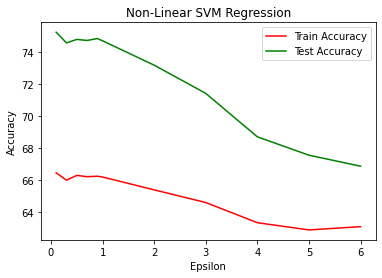

In [69]:
# 비선형 SVM에서의 epsilon의 역할
from sklearn.svm import SVR
eps_lst = [.1,.3,.5,.7,.9,1,2,3,4,5,6]
train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for i in eps_lst:
    print('NON-LINEAR SVM(EPSILON=%.1f)' % i)
    svl=SVR(kernel='rbf', C=1.0, epsilon=i)
    svl.fit(X_train, y_train)
    y_train_predsvl=svl.predict(X_train) 
    y_test_predsvl=svl.predict(X_test) 
    
    mse_l_train=mean_squared_error(y_train, y_train_predsvl)
    mse_l_test=mean_squared_error(y_test, y_test_predsvl)
    print('MSE train(epsilon=%.1f): %.3f, test(epsilon=%.1f): %.3f' % (i, mse_l_train, i, mse_l_test))
    train_errors.append(mse_l_train)
    test_errors.append(mse_l_test)
    
    R2_l=r2_score(y_train, y_train_predsvl)
    print('R^2 train(epsilon=%.1f): %.3f' % (i, R2_l))
    print()
    
x = np.arange(len(eps_lst)) + 1 # Create domain for plot
plt.plot(eps_lst, train_errors, label='Train Accuracy', color='red') # Plot training error over domain
plt.plot(eps_lst, test_errors, label='Test Accuracy', color='green') # Plot testing error over domain
plt.xlabel('Epsilon') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Non-Linear SVM Regression')
plt.plot() # Show graph